In [1]:
# importing the required library
import  pandas as pd
import numpy as np

In [2]:
# importing the data set
df=pd.read_csv('breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
# renaming the colums
df.rename(columns={"1000025":"id","5":"clumpthickness","1":"uni_cell_size","1.1":"uni_cell_shape","1.2":"marg_adhesion",
                     "2":"single_epi_cell_size","1.3":"bare_nuclei","3":"bland_chorma","1.4":"normal_nucleoli",
                     "1.5":"mitoses","2.1":"class_cancer"},inplace=True)
df.head()

,id,clumpthickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epi_cell_size,bare_nuclei,bland_chorma,normal_nucleoli,mitoses,class_cancer
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    698 non-null    int64 
 1   clumpthickness        698 non-null    int64 
 2   uni_cell_size         698 non-null    int64 
 3   uni_cell_shape        698 non-null    int64 
 4   marg_adhesion         698 non-null    int64 
 5   single_epi_cell_size  698 non-null    int64 
 6   bare_nuclei           698 non-null    object
 7   bland_chorma          698 non-null    int64 
 8   normal_nucleoli       698 non-null    int64 
 9   mitoses               698 non-null    int64 
 10  class_cancer          698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.replace("?",-99999,inplace=True) # without writing this line of code execute the below line of 
#code , it wii show error like"could not convert string to float: '?' ." so replace "?" with any integer value.

In [6]:
df.drop("id",axis=1,inplace=True)
df.head()

,clumpthickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epi_cell_size,bare_nuclei,bland_chorma,normal_nucleoli,mitoses,class_cancer
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [7]:
x=df.drop("class_cancer",1)
x.head()

,clumpthickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epi_cell_size,bare_nuclei,bland_chorma,normal_nucleoli,mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [8]:
y=df["class_cancer"]
y.head()

0    2
1    2
2    2
3    2
4    4
Name: class_cancer, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
accuracy=clf.score(x_test,y_test)
accuracy

0.9785714285714285

In [14]:
new_symptoms=np.array([1,2,3,4,5,6,7,8,9])
new_symptoms=new_symptoms.reshape(1,-1)
prediction=clf.predict(new_symptoms)
print(prediction)
if prediction==2:
    print("benign")
else:
    print('malignant')
        

[4]
malignant


In [15]:
new_symptoms=np.array([4,2,1,1,1,2,3,2,1])
new_symptoms=new_symptoms.reshape(1,-1)
prediction=clf.predict(new_symptoms)
print(prediction)
if prediction==2:
    print("benign")
else:
    print('malignant')
        

[2]
benign


# MY KNN ALGORITHM

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd



In [17]:
dataset={"k" : [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]} # small dataset to built and check 
# whether our own KNN algorithm is properly predicting or not.

In [18]:
new_feature=[5,7] # testing data for our KNN algorithm

In [19]:
dataset["k"]

[[1, 2], [2, 3], [3, 1]]

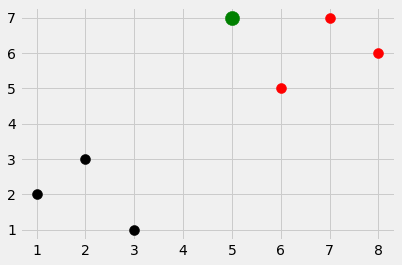

In [20]:
#visual representation of our dataset. Here black and red colors are two goups of dataset. and green
#is the data which is to be find out , that whether it belongs to black group or red group.
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]        
plt.scatter(new_feature[0],new_feature[1],s=200,color="green")
plt.show()        

In [21]:
#code for building our own KNN algorithm.
def  k_nearest_neighbers(total_data, predict,k=3):
    if len(total_data) >= k:
        warning.warn('k must be greater than the length of data')
    distance= []
    for  a_group in total_data:
        for a_feature in total_data[a_group]:
            
            euclidian_distance=np.linalg.norm(np.array(a_feature)-np.array(predict))
            distance.append([euclidian_distance,a_group])
    
    votes=[i[1] for i in sorted(distance)[0:k]] 
    print(votes)
    print(Counter(votes).most_common(1))
    
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result
    

In [22]:
result=k_nearest_neighbers(dataset,new_feature,k=3)
result

['r', 'r', 'r']
[('r', 3)]


'r'

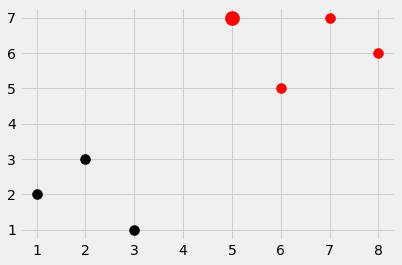

In [23]:
# we can see that our testing data belongs to red group.
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]        
plt.scatter(new_feature[0],new_feature[1],s=200,color=result)
plt.show()    

NOW LET'S CHECK THE BREAST CANCER DATA SET AGAINST OUR OWN BUILT KNN ALGORITHM AND SEE THE ACCURACY.

In [24]:
df=pd.read_csv('breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [25]:
df.rename(columns={"1000025":"id","5":"clumpthickness","1":"uni_cell_size","1.1":"uni_cell_shape","1.2":"marg_adhesion",
                     "2":"single_epi_cell_size","1.3":"bare_nuclei","3":"bland_chorma","1.4":"normal_nucleoli",
                     "1.5":"mitoses","2.1":"class_cancer"},inplace=True)
df.head()

,id,clumpthickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epi_cell_size,bare_nuclei,bland_chorma,normal_nucleoli,mitoses,class_cancer
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [26]:
df.replace("?",-99999,inplace=True)

In [27]:
df.drop("id",axis=1,inplace=True)

In [28]:
full_data = df.astype(int).values.tolist()


In [29]:
import random

In [30]:
test_size=0.2
train_set={2: [] ,4 : []}
test_set={2: [] ,4 : []}

train_data=full_data[ : -int(test_size *len(full_data))]
test_data=full_data[ -int(test_size *len(full_data)) : ]

In [31]:
for i in train_data :
    train_set[i[-1]].append(i[ : -1])
for i in test_data :
    test_set[i[-1]].append(i[ : -1])   

In [32]:
correct=0
total=0
for group in test_set:
    print(' ***ACTUAL GROUP IS*** :' ,group)
    for data in test_set[group]:
        vote=k_nearest_neighbers(train_set,data,k=5)
        print("estimated group :",vote)
    
        if group == vote:
            correct += 1
        total += 1
print("TOTAL NO OF CORRECT ESTIMATIONS:", correct)
print("TOTAL NO OF ESTIMATIONS: ", total )       
print("ACCURACY",correct/total)

 ***ACTUAL GROUP IS*** : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
estimated group : 2
[2, 2, 2, 2, 2]
[(2, 5)]
est

# we can see our own KNN algorithm is preidicting out put with accuracy above 90%.